# Projet : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bsita*

<b> Classification d'images de fruits :</b> *apples, bananas, coconuts, grapes, lemons, limes, mangos, oranges, pineapples, tomatoes*.

<b>Lien vers la doc :</b> https://keras.io/api/

In [8]:
import sys
from random import randint
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<b> Accès à la base de données ainsi qu'aux scripts </b>
1. <b>Version distante :</b> Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. <b>Version locale :</b> Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [9]:
# Version distante (1)
# !git clone https://github.com/EnzoN7/Image-classification.git
# path = "./Image-classification/images/"
# sys.path.insert(1, "./Image-classification/scripts/")
# sys.path.insert(1, "./Image-classification/models/")

# Version locale (2)
path = "./images/"
sys.path.insert(1, "./scripts")
sys.path.insert(1, "./models")

# (1) et (2)
from LoadData import load_data
from Plots import plot_training_analysis, plot_random_images
from TestData import test_data
from BasicConvolutionalNetwork import BasicConvolutionalNetwork
from VGG16Network import VGG16Network

<b> Stockage des fichiers au sein de tenseurs </b>

In [10]:
labels = ['apples', 'bananas', 'coconuts', 'grapes', 'lemons', 'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']
#labels = ['apples', 'mangos', 'tomatoes']

x_train, y_train = load_data(path, labels)
x_val, y_val = load_data(path, labels, _dataset='validation')
x_test, y_test = load_data(path, labels, _dataset='test')

x_train.shape = (3196, 64, 64, 3)
y_train.shape = (3196, 1)


100% (10 of 10) |########################| Elapsed Time: 0:00:39 Time:  0:00:39


x_validation.shape = (410, 64, 64, 3)
y_validation.shape = (410, 1)


100% (10 of 10) |########################| Elapsed Time: 0:00:05 Time:  0:00:05


x_test.shape = (528, 64, 64, 3)
y_test.shape = (528, 1)


100% (10 of 10) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


<b> Affichage d'une sélection d'images aléatoire pour vérifier que l'importation s'est bien déroulée </b>

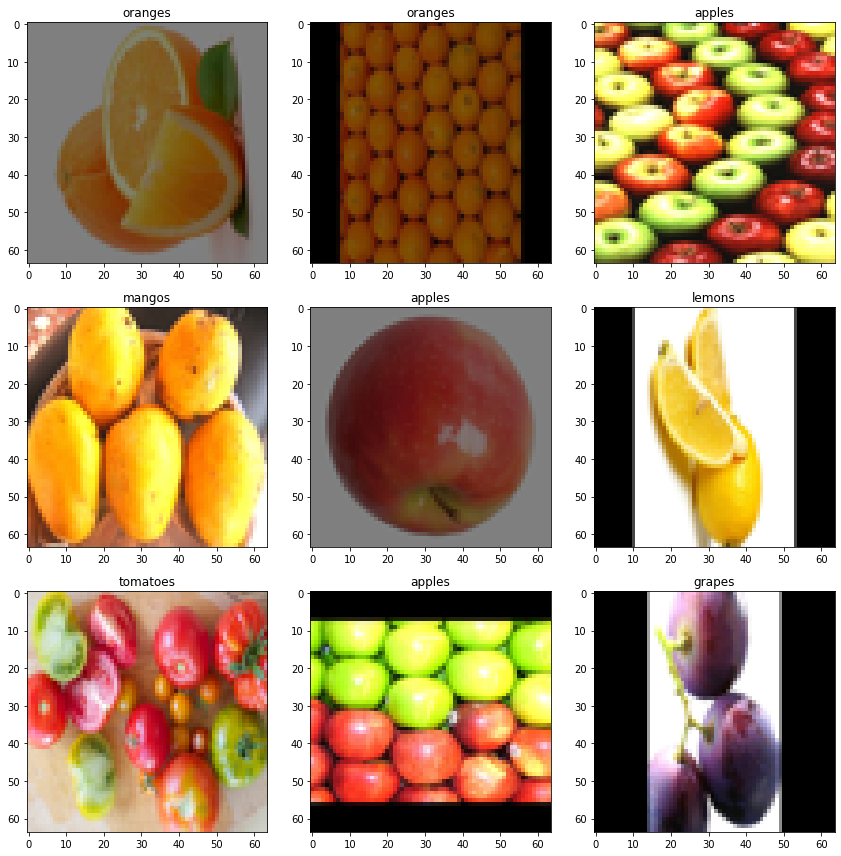

In [11]:
plot_random_images(x_train, y_train, labels)

<b>Lancement de l'entraînement</b>

In [12]:
IMAGE_SIZE = 64
METRICS = 'sparse_categorical_accuracy'

model = VGG16Network(len(labels), IMAGE_SIZE)

# A déclarer si on utilise un callback "ModelCheckpoint" dans model.fit().
modelPath = "./checkpoint/" + model.name + "/"

# Callback permettant de sauvegarder un modèle et de filtrer des données.
checkpoint = ModelCheckpoint(filepath=modelPath,
                             save_weights_only=True,
                             monitor='val_'+METRICS,
                             save_best_only=True,
                             save_freq='epoch')

# Objet permettant d'augmenter davantage la taille de la base de données.
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [13]:
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=[METRICS])

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10), 
                    #callbacks=[checkpoint],
                    validation_data=(x_val, y_val),
                    epochs=10)

Model: "vgg16_network_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  524544    
                                                                 
 dense_3 (Dense)             multiple                  2570      
                                                                 
Total params: 15,241,802
Trainable params: 15,241,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
320/320 [==============================] - 133s 411ms/step - loss: 1.3244 - sparse_categorical_accuracy: 0.5088 - val_loss: 1.0644 - val_sparse_categorical_accu

<b>Analyse post-entraînement</b>
- <b>Prédiction de la classe</b> éventuelle d'une image test prise aléatoirement dans la base de donnée
- Graphique montrant <b>l'évolution des métriques</b> au cours de l'entraînement sur les ensembles d'apprentissage et de validation
- <b>Evalutation du modèle</b> dans sa globalité

PREDICTIONS sur la donnée n°45/527
     apples -> 70.65%
     bananas -> 1.07%
     coconuts -> 2.02%
     grapes -> 1.48%
     lemons -> 0.16%
     limes -> 0.38%
     mangos -> 17.54%
     oranges -> 0.25%
     pineapples -> 0.41%
     tomatoes -> 6.04%

RESULTAT : apples / 70.65%


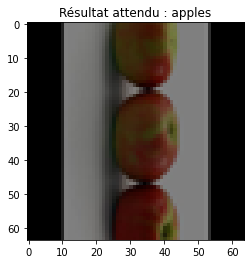

In [14]:
# A utiliser si on utilise un callback "ModelCheckpoint" dans model.fit(), à commenter sinon.
#model.load_weights(modelPath)

idx = randint(0, len(x_test) - 1)
test_data(model, labels, idx, x_test, y_test)

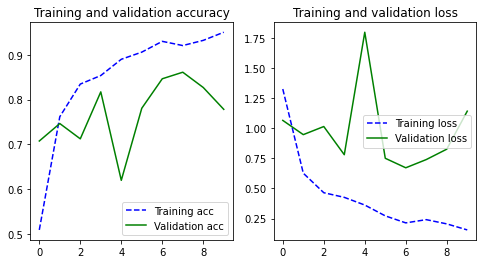

In [15]:
plot_training_analysis(history, METRICS)

In [16]:
print("EVALUATION DU MODELE " + model.name)
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=10)
print("Loss     : {0:.2f}%".format(loss_and_metrics[0] * 100))
print("Accuracy : {0:.2f}%".format(loss_and_metrics[1] * 100))

EVALUATION DU MODELE vgg16_network_1
53/53 [==============================] - 4s 73ms/step - loss: 0.8177 - sparse_categorical_accuracy: 0.8447
Loss     : 81.77%
Accuracy : 84.47%
